In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

/home/jgardi/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
PATH = "/home/jgardi/breed/data"

In [5]:
sz=224

In [6]:
torch.cuda.is_available()

True

In [7]:
torch.backends.cudnn.enabled

True

In [8]:
arch=resnet34

In [9]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz),
                                      test_name="test1")

In [10]:
data

In [11]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [12]:
learn.fit(0.01, 2)

epoch      trn_loss   val_loss   accuracy   
    0      2.120773   1.032691   0.770615  
    1      1.071725   0.690181   0.817091  



[array([0.69018]), 0.8170914543175447]

In [13]:
log_preds, y = learn.predict_with_targs(is_test=True)

In [14]:
probs = np.exp(log_preds)

In [15]:
df = pd.DataFrame(probs)

In [16]:
probs.shape

(10357, 120)

In [17]:
len(data.classes)

120

In [18]:
probs

array([[0.00009, 0.00155, 0.00787, ..., 0.03007, 0.00125, 0.00071],
       [0.00429, 0.00042, 0.00082, ..., 0.00014, 0.0006 , 0.00015],
       [0.00003, 0.00011, 0.00015, ..., 0.0002 , 0.0001 , 0.00003],
       ...,
       [0.00081, 0.00014, 0.00009, ..., 0.00022, 0.39518, 0.00017],
       [0.00079, 0.00005, 0.00206, ..., 0.00099, 0.00043, 0.00391],
       [0.00153, 0.00001, 0.00002, ..., 0.00001, 0.00001, 0.00515]], dtype=float32)

In [19]:
df.insert(0, 'id', [o[6:-4] for o in data.test_ds.fnames])

In [20]:
df.head()

,id,0,1,2,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,119
0,f1705303b30da3a48db2a5f34376b947,0.000094,0.001553,0.007870,0.007585,0.005196,0.000571,0.000128,0.000962,0.000525,...,0.001229,0.000864,0.201892,0.001758,0.262648,0.001474,0.001227,0.030068,0.001255,0.000710
1,a9b79809bc1301f8d148e15bfecf6485,0.004286,0.000419,0.000822,0.000112,0.000728,0.000478,0.000687,0.000163,0.000140,...,0.000771,0.000278,0.000051,0.000370,0.000196,0.000328,0.125225,0.000144,0.000599,0.000147
2,cc94a3bb7191a247f59e1540d8430c93,0.000027,0.000110,0.000152,0.000094,0.000067,0.035262,0.000035,0.000101,0.000113,...,0.000050,0.000011,0.000021,0.000164,0.000013,0.000723,0.000037,0.000202,0.000097,0.000030
3,f7b489a38302afc010d8a386a1b7d085,0.000015,0.000141,0.000117,0.000102,0.000104,0.065264,0.000049,0.000642,0.000335,...,0.000206,0.000029,0.000056,0.000214,0.000021,0.000164,0.000016,0.000204,0.000061,0.000033
4,6e21c96226078576342ca66e25eb1aa9,0.013116,0.001546,0.000423,0.002438,0.000373,0.000609,0.000218,0.000135,0.000031,...,0.000077,0.000073,0.002621,0.000228,0.000973,0.000382,0.000113,0.000764,0.000749,0.000563


In [21]:
SUBM = '/home/jgardi/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(f'{SUBM}results.gz', compression='gzip', index=False)

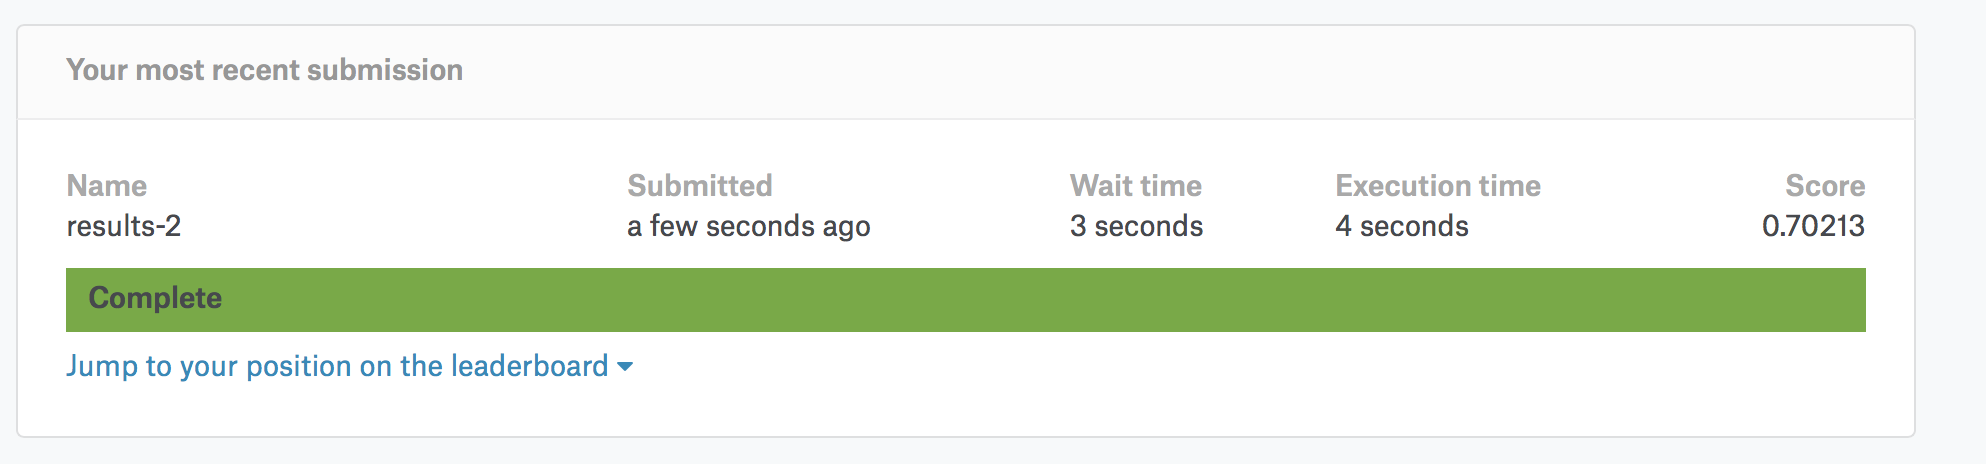

In [26]:
from IPython.display import Image
Image("kaggle_score.png")